In [1]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# 1️ Abrir janela para selecionar arquivo CSV
Tk().withdraw()  # Oculta a janela principal
caminho_arquivo = askopenfilename(
    title="Selecione o arquivo CSV",
    initialdir=r"C:\Users\luizn\OneDrive\Área de Trabalho\Analises de Dados\Portfolio_Ciencia_de_Dados\01_Analise_de_Vendas",
    filetypes=[("CSV files","*.csv")]
)

# 2️ Carregar a base original
dados = pd.read_csv(caminho_arquivo)

# 3️ Traduzir nomes das colunas
colunas_traduzidas = {
    'ORDERNUMBER': 'numero_pedido',
    'QUANTITYORDERED': 'quantidade_pedida',
    'PRICEEACH': 'preco_unitario',
    'ORDERLINENUMBER': 'numero_linha_pedido',
    'SALES': 'valor_venda',
    'ORDERDATE': 'data_pedido',
    'STATUS': 'status_pedido',
    'QTR_ID': 'trimestre',
    'MONTH_ID': 'mes',
    'YEAR_ID': 'ano',
    'PRODUCTLINE': 'linha_produto',
    'MSRP': 'preco_sugerido',
    'PRODUCTCODE': 'codigo_produto',
    'CUSTOMERNAME': 'nome_cliente',
    'PHONE': 'telefone',
    'ADDRESSLINE1': 'endereco_1',
    'ADDRESSLINE2': 'endereco_2',
    'CITY': 'cidade',
    'STATE': 'estado',
    'POSTALCODE': 'cep',
    'COUNTRY': 'pais',
    'TERRITORY': 'territorio',
    'CONTACTLASTNAME': 'sobrenome_contato',
    'CONTACTFIRSTNAME': 'nome_contato',
    'DEALSIZE': 'porte_negocio'
}
dados.rename(columns=colunas_traduzidas, inplace=True)

# 4️ Traduzir valores textuais principais
dados['status_pedido'] = dados['status_pedido'].replace({
    'Shipped':'Enviado',
    'Cancelled':'Cancelado',
    'On Hold':'Em Espera'
})

dados['linha_produto'] = dados['linha_produto'].replace({
    'Motorcycles':'Motocicletas',
    'Classic Cars':'Carros Clássicos',
    'Trucks and Buses':'Caminhões e Ônibus',
    'Vintage Cars':'Carros Vintage',
    'Planes':'Aviões',
    'Ships':'Navios',
    'Trains':'Trens',
    'Other':'Outros'
})

dados['pais'] = dados['pais'].replace({
    'USA':'EUA',
    'Canada':'Canadá',
    'France':'França',
    'Germany':'Alemanha',
    'UK':'Reino Unido',
    'Australia':'Austrália'
    # Adicione outros países conforme necessário
})

dados['porte_negocio'] = dados['porte_negocio'].replace({
    'Small':'Pequeno',
    'Medium':'Médio',
    'Large':'Grande'
})

# 5️ Ajustar datas para padrão brasileiro
dados['data_pedido'] = pd.to_datetime(dados['data_pedido'], errors='coerce').dt.strftime('%d/%m/%Y')

# 6️ Salvar nova base traduzida
dados.to_csv('vendas_traduzidas.csv', index=False, encoding='utf-8-sig')

print("✅ Nova base totalmente traduzida criada: vendas_traduzidas.csv")


✅ Nova base totalmente traduzida criada: vendas_traduzidas.csv


✅ Base carregada com sucesso!


,numero_pedido,quantidade_pedida,preco_unitario,numero_linha_pedido,valor_venda,data_pedido,status_pedido,trimestre,mes,ano,...,endereco_1,endereco_2,cidade,estado,cep,pais,territorio,sobrenome_contato,nome_contato,porte_negocio
0,10107,30,95.70,2,2871.00,24/02/2003,Enviado,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,EUA,NaN,Yu,Kwai,Pequeno
1,10121,34,81.35,5,2765.90,07/05/2003,Enviado,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,França,EMEA,Henriot,Paul,Pequeno
2,10134,41,94.74,2,3884.34,01/07/2003,Enviado,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,França,EMEA,Da Cunha,Daniel,Médio
3,10145,45,83.26,6,3746.70,25/08/2003,Enviado,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,EUA,NaN,Young,Julie,Médio
4,10159,49,100.00,14,5205.27,10/10/2003,Enviado,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,EUA,NaN,Brown,Julie,Médio


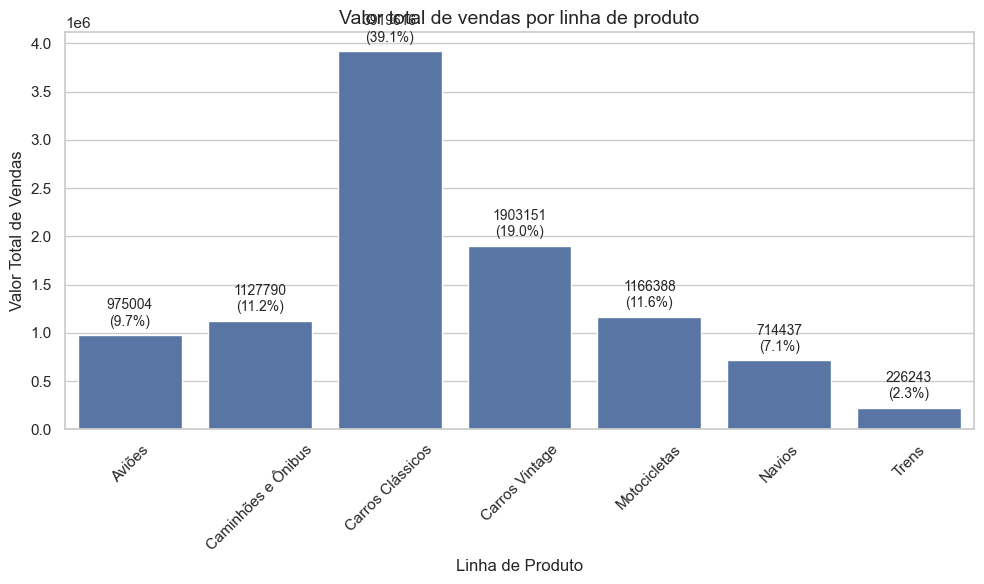

📊 Informações detalhadas para 'Valor total de vendas por linha de produto':


,linha_produto,valor_venda
2,Carros Clássicos,3919615.66
3,Carros Vintage,1903150.84
4,Motocicletas,1166388.34
1,Caminhões e Ônibus,1127789.84
0,Aviões,975003.57
5,Navios,714437.13
6,Trens,226243.47


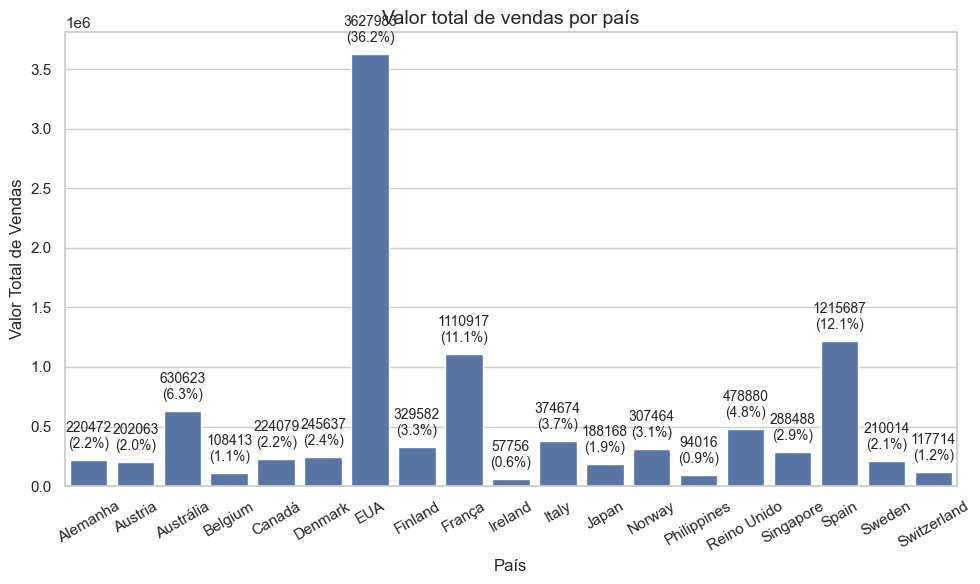

📊 Informações detalhadas para 'Valor total de vendas por país':


,pais,valor_venda
6,EUA,3627982.83
16,Spain,1215686.92
8,França,1110916.52
2,Austrália,630623.10
14,Reino Unido,478880.46
10,Italy,374674.31
7,Finland,329581.91
12,Norway,307463.70
15,Singapore,288488.41
5,Denmark,245637.15


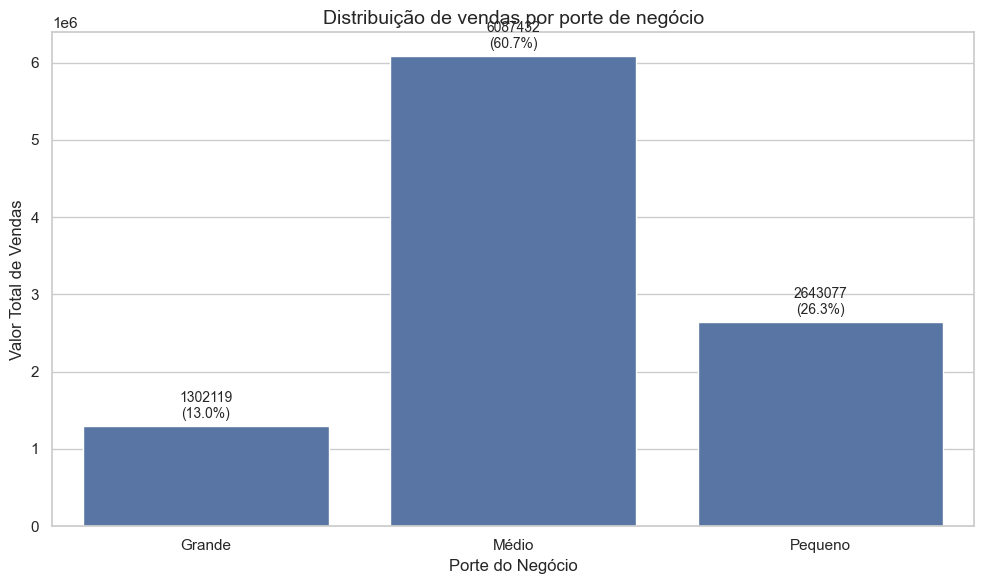

📊 Informações detalhadas para 'Distribuição de vendas por porte de negócio':


,porte_negocio,valor_venda
1,Médio,6087432.24
2,Pequeno,2643077.35
0,Grande,1302119.26


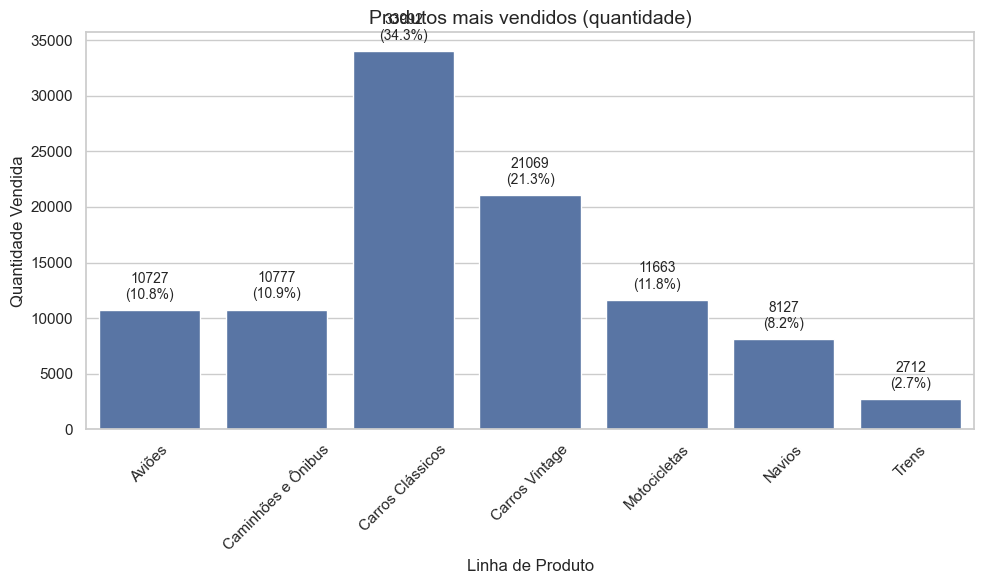

📊 Informações detalhadas para 'Produtos mais vendidos (quantidade)':


,linha_produto,quantidade_pedida
2,Carros Clássicos,33992
3,Carros Vintage,21069
4,Motocicletas,11663
1,Caminhões e Ônibus,10777
0,Aviões,10727
5,Navios,8127
6,Trens,2712


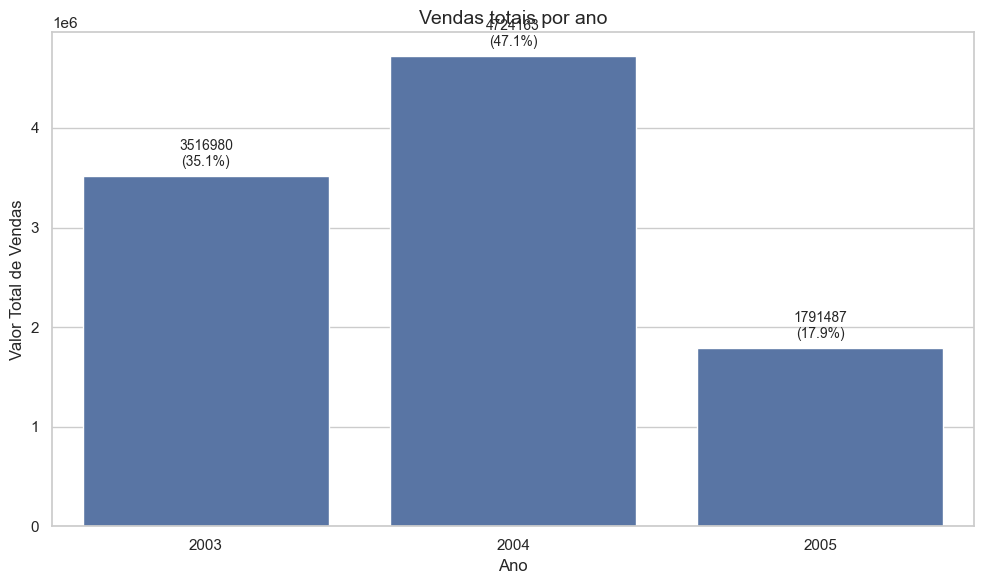

📊 Informações detalhadas para 'Vendas totais por ano':


,ano,valor_venda
1,2004,4724162.60
0,2003,3516979.54
2,2005,1791486.71


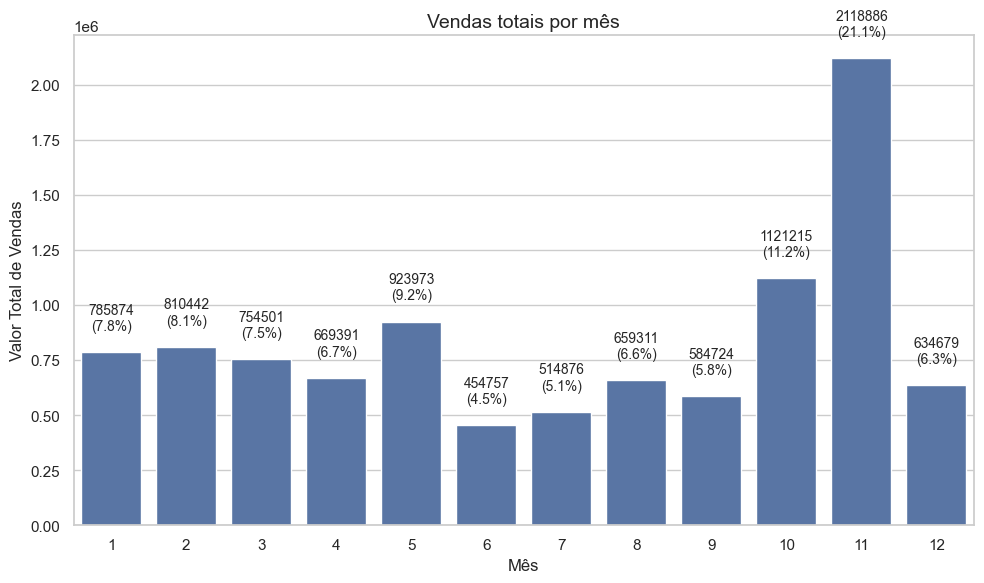

📊 Informações detalhadas para 'Vendas totais por mês':


,mes,valor_venda
10,11,2118885.67
9,10,1121215.22
4,5,923972.56
1,2,810441.90
0,1,785874.44
2,3,754501.39
3,4,669390.96
7,8,659310.57
11,12,634679.12
8,9,584724.27


In [11]:
# ====================================================
# 1️ Importação das bibliotecas
# ====================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams.update({'figure.autolayout': True})

# ====================================================
# 2️ Carregar a base traduzida
# ====================================================
# Oculta a janela principal do Tkinter
Tk().withdraw()  

# Abre a janela para selecionar o arquivo
caminho_arquivo = askopenfilename(
    title="Selecione o arquivo CSV",
    initialdir=r"C:\Users\luizn\OneDrive\Área de Trabalho\Analises de Dados\Portfolio_Ciencia_de_Dados\01_Analise_de_Vendas",
    filetypes=[("Arquivos CSV","*.csv")]        
)

# Carrega o CSV selecionado
dados = pd.read_csv(caminho_arquivo)

# Verificar primeiras linhas
print("✅ Base carregada com sucesso!")
display(dados.head())

# ====================================================
# 3️ Função para gráficos de barras com % e tabela
# ====================================================
def plot_bar_com_percentual(df, x_col, y_col, titulo, xlabel, ylabel, rotacao=0):
    """
    Cria gráfico de barras com valores dentro das barras e percentuais.
    Imprime tabela detalhada abaixo.
    """
    plt.figure(figsize=(10,6))
    total = df[y_col].sum()
    ax = sns.barplot(x=x_col, y=y_col, data=df)
    
    # Adicionar valores e % dentro das barras
    for p in ax.patches:
        altura = p.get_height()
        percentual = altura / total * 100
        ax.text(p.get_x() + p.get_width()/2., altura + total*0.01, 
                f'{altura:.0f}\n({percentual:.1f}%)', 
                ha="center", fontsize=10)
    
    plt.title(titulo, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotacao)
    plt.show()
    
    # Informações detalhadas abaixo do gráfico
    print(f"📊 Informações detalhadas para '{titulo}':")
    display(df.sort_values(by=y_col, ascending=False))

# ====================================================
# 4️ Valor total de vendas por linha de produto
# ====================================================
vendas_produto = dados.groupby('linha_produto')['valor_venda'].sum().reset_index()
plot_bar_com_percentual(vendas_produto, 'linha_produto', 'valor_venda',
                        'Valor total de vendas por linha de produto',
                        'Linha de Produto', 'Valor Total de Vendas', rotacao=45)

# ====================================================
# 5️ Valor total de vendas por país
# ===================================================
vendas_pais = dados.groupby('pais')['valor_venda'].sum().reset_index()
plot_bar_com_percentual(vendas_pais, 'pais', 'valor_venda',
                        'Valor total de vendas por país',
                        'País', 'Valor Total de Vendas', rotacao=30)

# ====================================================
# 6️ Distribuição de vendas por porte de negócio
# ====================================================
porte_negocio = dados.groupby('porte_negocio')['valor_venda'].sum().reset_index()
plot_bar_com_percentual(porte_negocio, 'porte_negocio', 'valor_venda',
                        'Distribuição de vendas por porte de negócio',
                        'Porte do Negócio', 'Valor Total de Vendas')

# ====================================================
# 7️ Produtos mais vendidos (quantidade)
# ====================================================
produtos_qtd = dados.groupby('linha_produto')['quantidade_pedida'].sum().reset_index()
plot_bar_com_percentual(produtos_qtd, 'linha_produto', 'quantidade_pedida',
                        'Produtos mais vendidos (quantidade)',
                        'Linha de Produto', 'Quantidade Vendida', rotacao=45)

# ====================================================
# 8️ Vendas por ano
# ====================================================
vendas_ano = dados.groupby('ano')['valor_venda'].sum().reset_index()
plot_bar_com_percentual(vendas_ano, 'ano', 'valor_venda',
                        'Vendas totais por ano',
                        'Ano', 'Valor Total de Vendas')

# ====================================================
# 9️ Vendas por mês (agregando todos os anos)
# ====================================================
vendas_mes = dados.groupby('mes')['valor_venda'].sum().reset_index()
plot_bar_com_percentual(vendas_mes, 'mes', 'valor_venda',
                        'Vendas totais por mês',
                        'Mês', 'Valor Total de Vendas')


In [14]:
# ====================================================
# 1️ Importar bibliotecas de ML
# ====================================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ====================================================
# 2️ Selecionar features e target
# ====================================================
# Vamos prever 'valor_venda' usando 'quantidade_pedida', 'ano' e 'mes'
X = dados[['quantidade_pedida', 'ano', 'mes']]
y = dados['valor_venda']

# ====================================================
# 3️ Dividir em treino e teste
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================================================
# 4️ Treinar modelo de regressão linear
# ====================================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# ====================================================
# 5️ Fazer previsões
# ====================================================
y_pred = modelo.predict(X_test)

# ===================================================
# 6️ Avaliar modelo
# ====================================================
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("✅ Modelo de previsão simples treinado!")
print(f"R² (explicação da variabilidade): {r2:.2f}")
print(f"RMSE (erro médio): {rmse:.2f}")

# ====================================================
# 7️  Comparar valores reais x previstos
# ====================================================
comparacao = X_test.copy()
comparacao['Valor_Real'] = y_test
comparacao['Valor_Previsto'] = y_pred
display(comparacao.head(10))


✅ Modelo de previsão simples treinado!
R² (explicação da variabilidade): 0.33
RMSE (erro médio): 1709.75


,quantidade_pedida,ano,mes,Valor_Real,Valor_Previsto
1091,21,2003,5,1536.57,2158.280547
2328,25,2003,5,2168.50,2552.901912
1474,39,2003,12,4351.23,3928.309750
1437,60,2005,5,3880.20,5953.708694
1105,43,2004,8,3042.68,4300.161428
239,49,2005,5,7969.36,4868.499941
1366,39,2005,2,7827.30,3884.418074
1407,23,2003,10,1672.10,2351.471987
1858,34,2004,9,2328.66,3411.439508
1061,55,2005,4,8289.05,5461.255837


In [15]:
import joblib

# Salvar o modelo
joblib.dump(modelo, "modelo_vendas.pkl")
print("✅ Modelo salvo como 'modelo_vendas.pkl'")

✅ Modelo salvo como 'modelo_vendas.pkl'


In [16]:
# Carregar modelo salvo
modelo = joblib.load("modelo_vendas.pkl")

# Usar para novas previsões
novos_dados = pd.DataFrame({
    'quantidade_pedida': [10, 20, 5],
    'ano': [2025, 2025, 2025],
    'mes': [11, 12, 11]
})

previsoes = modelo.predict(novos_dados)
print(previsoes)
import pandas as pd
import matplotlib.pyplot as plt

[4.94696922e+02 1.48042649e+03 1.42021566e+00]


In [20]:
# ====================================================
# 1️ Importar bibliotecas
# ====================================================
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# ====================================================
# 2️ Abrir janela para selecionar o arquivo
# ====================================================
Tk().withdraw()  # Ocultar janela principal

caminho_arquivo = askopenfilename(
    title="Selecione o arquivo CSV",
    filetypes=[("Arquivos CSV", "*.csv")]
)

# ====================================================
# 3️ Carregar a base selecionada
# ====================================================
dados = pd.read_csv(caminho_arquivo)
print("✅ Base carregada com sucesso!")
display(dados.head())

# ====================================================
# 4️ Resumo geral da base
# ====================================================
total_pedidos = len(dados)
total_vendas = dados['valor_venda'].sum()
total_quantidade = dados['quantidade_pedida'].sum()
anos = dados['ano'].unique()
paises = dados['pais'].nunique()

print("\n📌 Resumo Geral da Base")
print(f"Total de pedidos: {total_pedidos}")
print(f"Receita total: R${total_vendas:,.2f}")
print(f"Quantidade total vendida: {total_quantidade}")
print(f"Ano(s) presente(s): {anos}")
print(f"Número de países atendidos: {paises}\n")

# ====================================================
# 5️ Linhas de produto mais vendidas
# ====================================================
top_produto = dados.groupby('linha_produto')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Linhas de produto mais vendidas:")
print(top_produto.head(5), "\n")

# ====================================================
# 6️ Países que mais geraram vendas
# ====================================================
top_pais = dados.groupby('pais')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Países que mais geraram vendas:")
print(top_pais.head(5), "\n")

# ====================================================
# 7️ Principais clientes
# ====================================================
top_cliente = dados.groupby('nome_cliente')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Principais clientes:")
print(top_cliente.head(5), "\n")

# ====================================================
# 8️ Distribuição por porte de negócio
# ====================================================
top_porte = dados.groupby('porte_negocio')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Distribuição de vendas por porte de negócio:")
print(top_porte, "\n")

# ====================================================
# 9️ Meses com mais vendas
# ====================================================
top_mes = dados.groupby('mes')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Meses com mais vendas:")
print(top_mes.head(5), "\n")

# ====================================================
#  Ano com mais vendas
# ====================================================
top_ano = dados.groupby('ano')['valor_venda'].sum().sort_values(ascending=False)
print("📌 Ano com mais vendas:")
print(top_ano, "\n")


✅ Base carregada com sucesso!


,numero_pedido,quantidade_pedida,preco_unitario,numero_linha_pedido,valor_venda,data_pedido,status_pedido,trimestre,mes,ano,...,endereco_1,endereco_2,cidade,estado,cep,pais,territorio,sobrenome_contato,nome_contato,porte_negocio
0,10107,30,95.70,2,2871.00,24/02/2003,Enviado,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,EUA,NaN,Yu,Kwai,Pequeno
1,10121,34,81.35,5,2765.90,07/05/2003,Enviado,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,França,EMEA,Henriot,Paul,Pequeno
2,10134,41,94.74,2,3884.34,01/07/2003,Enviado,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,França,EMEA,Da Cunha,Daniel,Médio
3,10145,45,83.26,6,3746.70,25/08/2003,Enviado,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,EUA,NaN,Young,Julie,Médio
4,10159,49,100.00,14,5205.27,10/10/2003,Enviado,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,EUA,NaN,Brown,Julie,Médio



📌 Resumo Geral da Base
Total de pedidos: 2823
Receita total: R$10,032,628.85
Quantidade total vendida: 99067
Ano(s) presente(s): [2003 2004 2005]
Número de países atendidos: 19

📌 Linhas de produto mais vendidas:
linha_produto
Carros Clássicos      3919615.66
Carros Vintage        1903150.84
Motocicletas          1166388.34
Caminhões e Ônibus    1127789.84
Aviões                 975003.57
Name: valor_venda, dtype: float64 

📌 Países que mais geraram vendas:
pais
EUA            3627982.83
Spain          1215686.92
França         1110916.52
Austrália       630623.10
Reino Unido     478880.46
Name: valor_venda, dtype: float64 

📌 Principais clientes:
nome_cliente
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Name: valor_venda, dtype: float64 

📌 Distribuição de vendas por porte de negócio:
porte_negocio
Médio      6087432.24
P